# Part I: Pulse Rate Algorithm


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

import scipy as sp
import numpy as np

In [3]:
src_path: str = "../src"
sys.path.append(src_path)

In [4]:
from utils import *

In [5]:
fs: int = 125
passband: Tuple[float, float] = (40 / 60, 240 / 60)  # 40-240BPM
data_root: Path = Path("../data")

---
## 1. Exploratory Data Analysis (EDA)

Load and explore one sample of the troika dataset.

In [6]:
signal_files, ref_files = get_troika_files(data_root.joinpath("troika"))
ppg, acc_x, acc_y, acc_z = load_troika_file(signal_files[0])
acc_mag = np.sqrt(np.sum(np.square(np.vstack((acc_x, acc_y, acc_z))), axis=0))

### 1.1. Plot signals (before bandpass filtering)

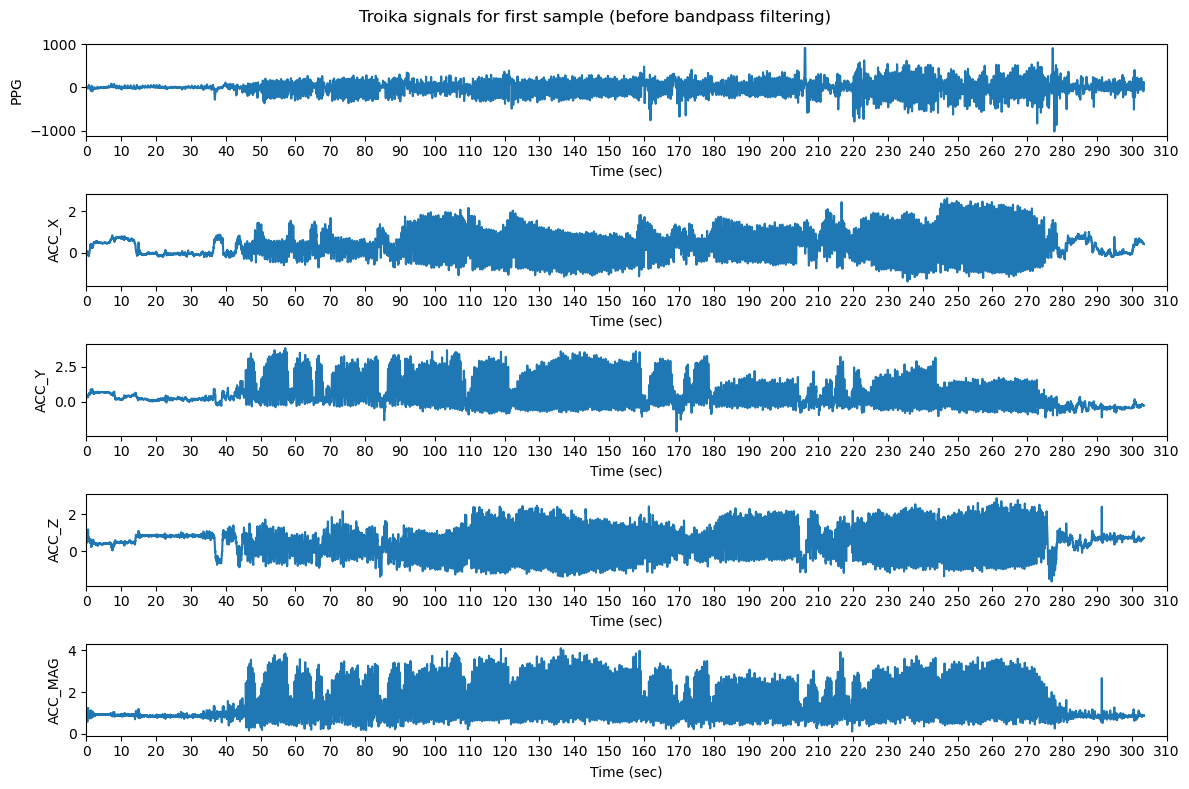

In [7]:
ts = np.arange(len(ppg)) / fs
fig, axs = plt.subplots(5, figsize=(12, 8))
fig.suptitle("Troika signals for first sample (before bandpass filtering)")

for ax, sig_data, sig_name in zip(
    axs,
    (ppg, acc_x, acc_y, acc_z, acc_mag),
    ("ppg", "acc_x", "acc_y", "acc_z", "acc_mag"),
):
    # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(plticker.MultipleLocator(base=10.0))
    ax.plot(ts, sig_data)
    ax.set(xlabel="Time (sec)", ylabel=sig_name.upper(), xlim=(0, 310))
plt.tight_layout()

The plot above clearly shows an increase in activity at around 45 seconds, and a decrease in activity at around 280 seconds.

### 1.2. Plot signals (after bandpass filtering)

In [8]:
ppg_filt, acc_x_filt, acc_y_filt, acc_z_filt, acc_mag_filt = [
    bandpass_filter(sig_data, passband, fs)
    for sig_data in (ppg, acc_x, acc_y, acc_z, acc_mag)
]

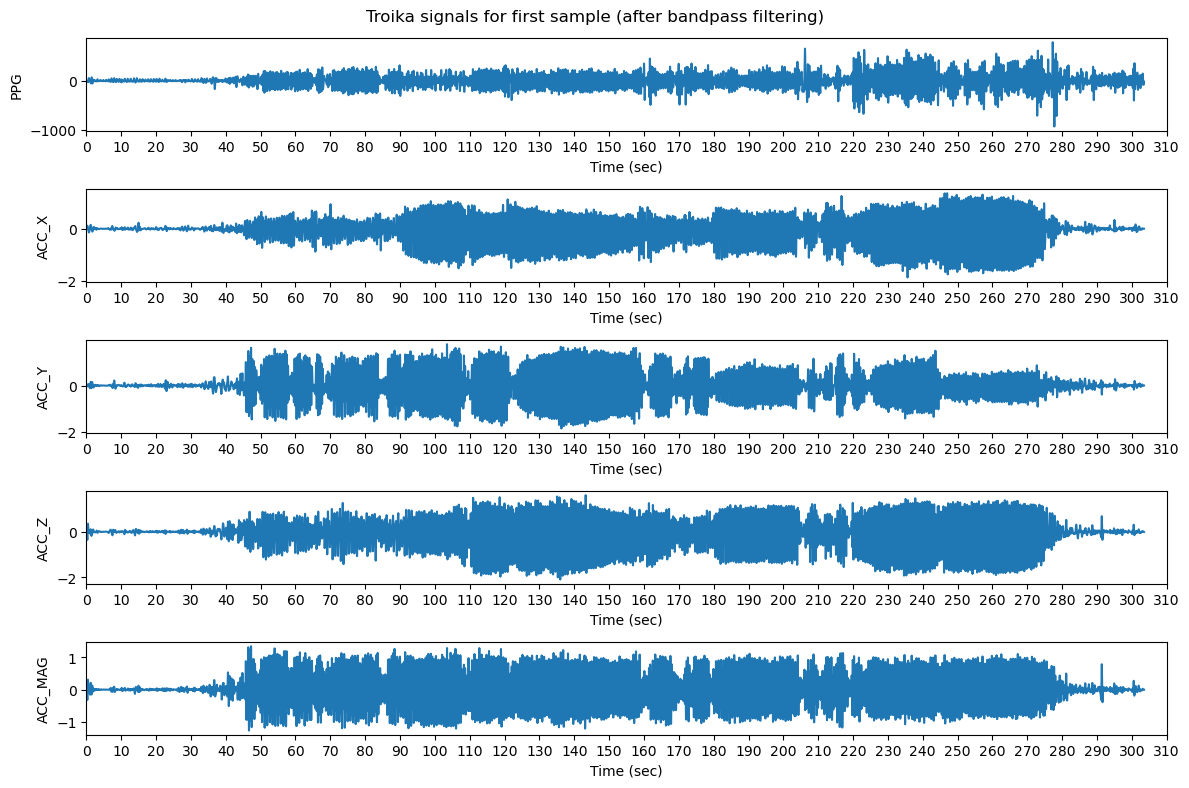

In [9]:
ts = np.arange(len(ppg)) / fs
fig, axs = plt.subplots(5, figsize=(12, 8))
fig.suptitle("Troika signals for first sample (after bandpass filtering)")

for ax, sig_data, sig_name in zip(
    axs,
    (ppg_filt, acc_x_filt, acc_y_filt, acc_z_filt, acc_mag_filt),
    ("ppg", "acc_x", "acc_y", "acc_z", "acc_mag"),
):
    # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(plticker.MultipleLocator(base=10.0))
    ax.plot(ts, sig_data)
    ax.set(xlabel="Time (sec)", ylabel=sig_name.upper(), xlim=(0, 310))
plt.tight_layout()

It is apparent that signals are considerable less noisy after our bandpass filtering!

### 1.3. Plot PPG Spectrogram

The spectrogram shows 8-second windows with 4-second overlaps.

(501, 148) (501,)


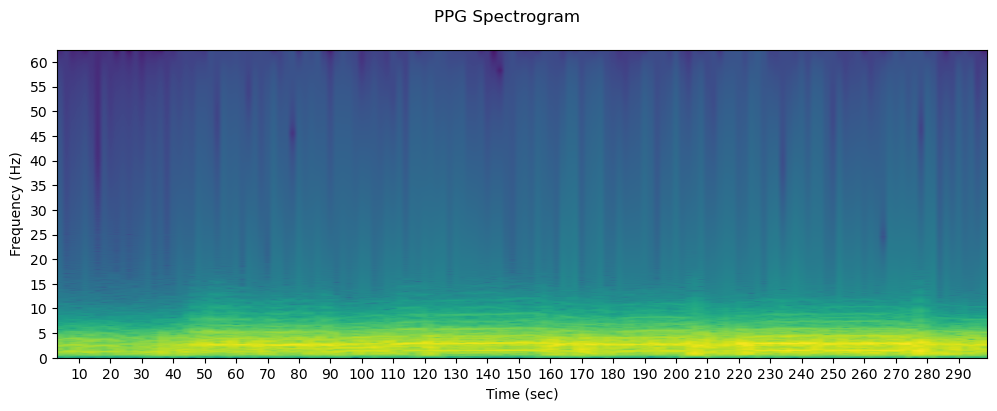

In [10]:
fig, ax = plt.subplots(1, figsize=(12, 4))
fig.suptitle("PPG Spectrogram")

ppg_specs, ppg_freqs, _, _ = plt.specgram(ppg_filt, Fs=fs, NFFT=8 * fs, noverlap=6 * fs)

ax.xaxis.set_major_locator(plticker.MultipleLocator(base=10.0))
ax.yaxis.set_major_locator(plticker.MultipleLocator(base=5.0))
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")

print(ppg_specs.shape, ppg_freqs.shape)

### 1.4. Plot Accelerometer Magnitude Spectrogram

The spectrogram shows 8-second windows with 4-second overlaps.

(501, 148) (501,)


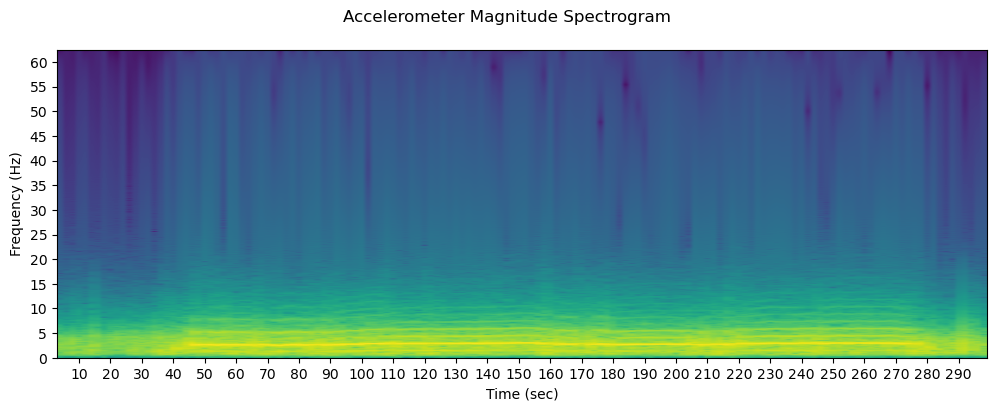

In [11]:
fig, ax = plt.subplots(1, figsize=(12, 4))
fig.suptitle("Accelerometer Magnitude Spectrogram")

acc_mag_specs, acc_mag_freqs, _, _ = plt.specgram(
    acc_mag_filt, Fs=fs, NFFT=8 * fs, noverlap=6 * fs
)

ax.xaxis.set_major_locator(plticker.MultipleLocator(base=10.0))
ax.yaxis.set_major_locator(plticker.MultipleLocator(base=5.0))
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")

print(acc_mag_specs.shape, acc_mag_freqs.shape)

### 1.5. Overlap of maximum frequencies per window


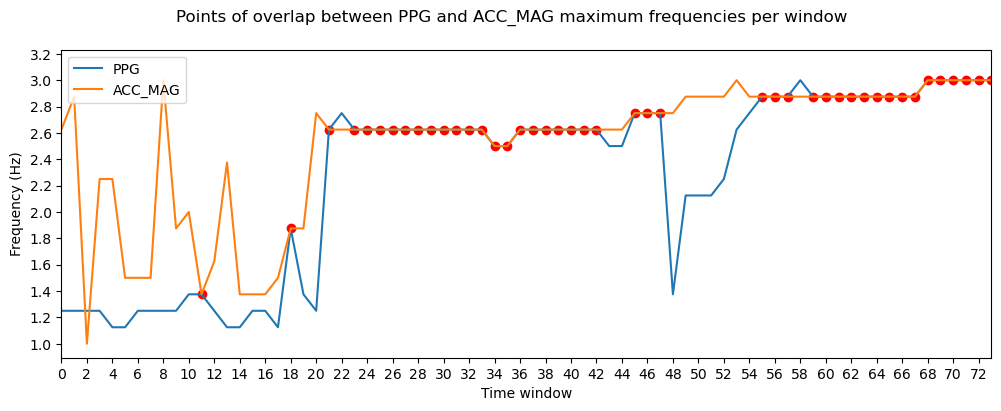

In [12]:
fig, ax = plt.subplots(1, figsize=(12, 4))
fig.suptitle("Points of overlap between PPG and ACC_MAG maximum frequencies per window")

ppg_specs_max_freq = ppg_freqs[np.argmax(ppg_specs, axis=0)]
plt.plot(ppg_specs_max_freq, label="PPG")

acc_mag_max_freq = acc_mag_freqs[np.argmax(acc_mag_specs, axis=0)]
plt.plot(acc_mag_max_freq, label="ACC_MAG")

overlap = ppg_specs_max_freq == acc_mag_max_freq
plt.scatter(np.arange(len(acc_mag_max_freq))[overlap], acc_mag_max_freq[overlap], c="r")

ax.xaxis.set_major_locator(plticker.MultipleLocator(base=2.0))
ax.yaxis.set_major_locator(plticker.MultipleLocator(base=0.2))
plt.xlabel("Time window")
plt.ylabel("Frequency (Hz)")
plt.xlim(0, 73)
plt.legend(loc="upper left")

The plot above shows many overlaps between the PPG and ACC signals. We will need to evaluate whethere a better pulse rate estimate can be found in the PPG signal. If not found, we will have to stick with the overlapping signal.

---
## 2. Pulse Rate Estimation

---
## 3. Pulse Rate Algorithm Evaluation

---
## 4. Conclusions and Project Write-up

### 4.1. Code Description

...

### 4.2. Data Description

...

### 4.3. Algorithm Description

...

### 4.4. Algorithm Performance

...

-----
### Project Write-up

Answer the following prompts to demonstrate understanding of the algorithm you wrote for this specific context.

> - **Code Description** - Include details so someone unfamiliar with your project will know how to run your code and use your algorithm. 
> - **Data Description** - Describe the dataset that was used to train and test the algorithm. Include its short-comings and what data would be required to build a more complete dataset.
> - **Algorithhm Description** will include the following:
>   - how the algorithm works
>   - the specific aspects of the physiology that it takes advantage of
>   - a description of the algorithm outputs
>   - caveats on algorithm outputs 
>   - common failure modes
> - **Algorithm Performance** - Detail how performance was computed (eg. using cross-validation or train-test split) and what metrics were optimized for. Include error metrics that would be relevant to users of your algorithm. Caveat your performance numbers by acknowledging how generalizable they may or may not be on different datasets.

Your write-up goes here...

-----
### Next Steps
You will now go to **Test Your Algorithm** (back in the Project Classroom) to apply a unit test to confirm that your algorithm met the success criteria. 